Exercises

1.1

Implement K-means described in k-means-clustering-Wikipedia.2002271236.pdf.
Use the one denoted by naive algorithm in the document.

Translation: k-means-clustering-Wikipedia.2002271236.pdf にある K平均法(naive algorithm)を実装せよ．




1.2

Plot 100 two-dimensional data points and plot by the following code:
```
 ntras = 100;
 thets = rand(1,ntras)*(2*pi); 
 radis = rand(1,ntras)*0.1+1.0; 
 X     = [cos(thets);sin(thets)]*diag(radis); 
 plot( X(1,:), X(2,:), 'ko' );
 csvwrite( 'k.X.csv', X' ); 
```


1.3

Set K=2 and record the value of Within-cluster sum of squares (WCSS). Plot WCSS against interation numbers. Verify that the curve is monotonically decreased.

Translation: K=2 とし，Within-cluster sum of squares (WCSS) の値を記録しろ．横軸反復数，縦軸 WCSS として，グラフを描け．ヒント（関数 plot）．単調減少していることを確かめよ．




1.4

Plot K-means with K=2,3,4. Use different colors for different clusters. Use of function print_eps_and_png is recommended to generate figures.

Translation: クラスタ数 2, 3, 4 の場合で K平均法を適用しろ．
クラスタリング結果をもとに色付けしてプロットせよ．




1.5

Create the following function. The function applies K-means five times with different initial solutions. The solutions are chosen randomly. Find the minimal one from the five WCSS, and return the assignment associated with the minimal WCSS.

Translation: 初期割当をランダムに選んで，５回 K 平均法を行い，最も J(U,V) が小さい結果を最終結果とするような関数を作れ．




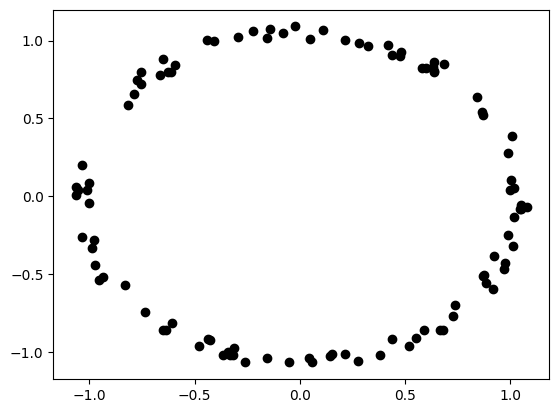

In [17]:
import numpy as np
import matplotlib.pyplot as plt

ntras = 100
thets = np.random.rand(ntras) * (2 * np.pi)
radis = np.random.rand(ntras) * 0.1 + 1.0
X = np.array([np.cos(thets), np.sin(thets)]) * radis
plt.plot(X[0,:], X[1, :],'ko')
plt.show()

np.savetxt('kX.csv', X.T, delimiter=',')

In [18]:
#import
import pandas as pd
import random
import seaborn as sns
import matplotlib.ticker
from matplotlib import pyplot as plt
from typing import List

#A function that calculates the distance from a point to the mean
def distance(l1: List[float], l2: List[float]) -> float:
    assert len(l1) == len(l2)
    return sum([(a1 - a2)**2 for a1, a2 in zip(l1, l2)])

#A function that receives a data frame and the number of clusters as input
def clustering(df: pd.DataFrame, n_clusters: int) -> List[int]:
    columns = df.columns
    
    #Assignment of random coordinates to cluster centers
    coord_means = [[random.random() for _ in range(len(columns))] for _ in range(n_clusters)]
    close_mean1 = pd.Series([-1 for _ in range(df.shape[0])])
    close_mean2 = pd.Series([-2 for _ in range(df.shape[0])])
    
    #The learning process stops when not a single point has changed its cluster during the iteration
    while list(close_mean1) != list(close_mean2):
        close_mean1 = close_mean2
        close_mean2 = pd.Series([-1 for _ in range(df.shape[0])])
        
        #Finding the nearest cluster center for each point
        for i in range(df.shape[0]):
            dist = []
            for coord_mean in coord_means:
                dist.append(distance(list(df.iloc[i,]), coord_mean))
            close_mean2[i] = dist.index(min(dist))
        
        #Calculation of new coordinates for cluster centers
        for j, coord_mean in enumerate(coord_means):
            if len(df[close_mean2 == j]) != 0:
                for k, column in enumerate(columns):
                    coord_mean[k] = df.loc[close_mean2 == j, column].mean()
            else:
                for k, column in enumerate(columns):
                    coord_mean[k] = random.random()
    
    return close_mean2
    

In [19]:
random.seed(1)
df1 = pd.DataFrame(X)
for i in range(1, 11):
    df1[i] = clustering(df1, i)

df1.iloc[:, 13:].nunique()

13    2
14    2
15    2
16    2
17    2
     ..
95    2
96    2
97    2
98    2
99    2
Length: 87, dtype: int64

In [20]:
n_clusters = []
sum_dist = []

for i in range(1,11):
    clusters = sorted(df1[i].unique())
    s = 0
    
    for cluster in clusters:
        coord = list(df1.loc[df1[i] == cluster, :'Proline'].mean())

        for ind in df1.loc[df1[i] == cluster,].index:
            s += distance(list(df1.iloc[ind, :2]),coord)
    
    n_clusters.append(len(clusters))
    sum_dist.append(s)


AssertionError: 

In [21]:
import pandas as pd
import random
import numpy as np
from typing import List

def distance_np(l1:np.ndarray, l2:np.ndarray) -> float:
    return np.lialog.norm(l1 - l2)

def clustering(df:pd.DataFrame, n_clusters:int) -> List[int]:
    colums = df.columns
    data = df.values
    n_samples, n_feautures = data.shape

    coord_means = data[np.random.choice(n_samples, n_clusters, replace=False)]

    close_mean1 = np.full(n_samples, -1)
    close_mean2 = np.full(n_samples, -2)

    while not np.array_equal(close_mean1, close_mean2):
        close_mean1 = close_mean2.copy()

        for i in range(n_samples):
            distances = [distance_np(data[i], coord) for coord in coord_means]
            close_mean2[i] = np.argmin(distances)

        for j in range(n_clusters):
            cluster_points = data[close_mean2 == j]
            if len(cluster_points) > 0:
                coord_means[j] = cluster_points.mean(axis=0)
            else:
                coord_means[j] = data[np.random.choice(n_samples)]

    return close_mean2.tolist

In [22]:
df1 = pd.DataFrame(X)
# クラスタリング実行
clusters = clustering(df, 3)
#df['cluster'] = clusters

# 可視化
sns.scatterplot(data=df1, x='x', y='y')
plt.title('K-means Clustering')
plt.show()


ValueError: Cannot take a larger sample than population when 'replace=False'